### Create Latitude and Longitude Combinations

In [10]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
# coordinates[0:10]

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

632

In [11]:
cities[0:10]

['illoqqortoormiut',
 'rio gallegos',
 'attawapiskat',
 'barentsburg',
 'rikitea',
 'port alfred',
 'sistranda',
 'tsihombe',
 'acapulco',
 'bluff']

### Import Dependencies, and Initialize an Empty List and Counters

In [13]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

### Loop though the cities list, build URL, handle API Request erros with try-except

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 1 | rio gallegos
Processing Record 3 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 4 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | sistranda
Processing Record 8 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 9 of Set 1 | acapulco
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | nyzhnya duvanka
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | polunochnoye
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | calvinia
Processing Record 16 of Set 1 | maridi
Processing Record 17 of Set 1 | codrington
Processing Record 18 of Set 1 | kazalinsk
City not found. Skipping...
Proc

Processing Record 35 of Set 4 | dhidhdhoo
Processing Record 36 of Set 4 | qaanaaq
Processing Record 37 of Set 4 | raudeberg
Processing Record 38 of Set 4 | mayor pablo lagerenza
Processing Record 39 of Set 4 | victoria
Processing Record 40 of Set 4 | souillac
Processing Record 41 of Set 4 | izumo
Processing Record 42 of Set 4 | venado tuerto
Processing Record 43 of Set 4 | smithers
Processing Record 44 of Set 4 | antoing
Processing Record 45 of Set 4 | awbari
Processing Record 46 of Set 4 | upernavik
Processing Record 47 of Set 4 | gedo
Processing Record 48 of Set 4 | daxian
City not found. Skipping...
Processing Record 49 of Set 4 | galiwinku
City not found. Skipping...
Processing Record 50 of Set 4 | charters towers
Processing Record 1 of Set 5 | bonavista
Processing Record 2 of Set 5 | gimli
Processing Record 3 of Set 5 | mabaruma
Processing Record 4 of Set 5 | cervo
Processing Record 5 of Set 5 | fairbanks
Processing Record 6 of Set 5 | port hardy
Processing Record 7 of Set 5 | bar

Processing Record 24 of Set 8 | yerbogachen
Processing Record 25 of Set 8 | port lincoln
Processing Record 26 of Set 8 | tevaitoa
Processing Record 27 of Set 8 | saint-louis
Processing Record 28 of Set 8 | namibe
Processing Record 29 of Set 8 | beloha
Processing Record 30 of Set 8 | bathsheba
Processing Record 31 of Set 8 | olinda
Processing Record 32 of Set 8 | bangassou
Processing Record 33 of Set 8 | biak
Processing Record 34 of Set 8 | carnarvon
Processing Record 35 of Set 8 | sinkat
City not found. Skipping...
Processing Record 36 of Set 8 | broome
Processing Record 37 of Set 8 | agidel
Processing Record 38 of Set 8 | kavieng
Processing Record 39 of Set 8 | mackay
Processing Record 40 of Set 8 | nago
Processing Record 41 of Set 8 | inhambane
Processing Record 42 of Set 8 | opuwo
Processing Record 43 of Set 8 | bukachacha
Processing Record 44 of Set 8 | fortuna
Processing Record 45 of Set 8 | linhai
Processing Record 46 of Set 8 | grand centre
City not found. Skipping...
Processing

City not found. Skipping...
Processing Record 14 of Set 12 | floro
Processing Record 15 of Set 12 | boende
Processing Record 16 of Set 12 | sao luis de montes belos
Processing Record 17 of Set 12 | ixtapa
Processing Record 18 of Set 12 | kayankulam
Processing Record 19 of Set 12 | annau
Processing Record 20 of Set 12 | cuiluan
Processing Record 21 of Set 12 | antofagasta
Processing Record 22 of Set 12 | port augusta
Processing Record 23 of Set 12 | alexandria
Processing Record 24 of Set 12 | dosso
Processing Record 25 of Set 12 | tsienyane
City not found. Skipping...
Processing Record 26 of Set 12 | tucuma
Processing Record 27 of Set 12 | erzin
Processing Record 28 of Set 12 | leshan
Processing Record 29 of Set 12 | mazagao
Processing Record 30 of Set 12 | alyangula
Processing Record 31 of Set 12 | sobolevo
Processing Record 32 of Set 12 | araouane
Processing Record 33 of Set 12 | sioux lookout
Processing Record 34 of Set 12 | ye
City not found. Skipping...
Processing Record 35 of Set 

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rio Gallegos,-51.6226,-69.2181,57.25,77,0,21.85,AR,2022-01-29 02:54:29
1,Rikitea,-23.1203,-134.9692,78.03,71,90,13.89,PF,2022-01-29 02:54:30
2,Port Alfred,-33.5906,26.8910,66.38,81,87,6.22,ZA,2022-01-29 02:51:59
3,Sistranda,63.7256,8.8340,42.76,89,100,31.03,NO,2022-01-29 02:54:30
4,Acapulco,16.8634,-99.8901,77.16,78,0,3.42,MX,2022-01-29 02:53:44
5,Bluff,-46.6000,168.3333,68.81,60,92,8.95,NZ,2022-01-29 02:54:31
6,Nyzhnya Duvanka,49.5846,38.1743,31.14,94,100,11.14,UA,2022-01-29 02:54:31
7,Polunochnoye,60.8697,60.4153,-10.55,98,87,3.15,RU,2022-01-29 02:54:32
8,Yellowknife,62.4560,-114.3525,-6.59,88,20,6.91,CA,2022-01-29 02:51:00
9,Calvinia,-31.4707,19.7760,66.07,59,0,8.63,ZA,2022-01-29 02:54:13


In [21]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rio Gallegos,AR,2022-01-29 02:54:29,-51.6226,-69.2181,57.25,77,0,21.85
1,Rikitea,PF,2022-01-29 02:54:30,-23.1203,-134.9692,78.03,71,90,13.89
2,Port Alfred,ZA,2022-01-29 02:51:59,-33.5906,26.8910,66.38,81,87,6.22
3,Sistranda,NO,2022-01-29 02:54:30,63.7256,8.8340,42.76,89,100,31.03
4,Acapulco,MX,2022-01-29 02:53:44,16.8634,-99.8901,77.16,78,0,3.42
5,Bluff,NZ,2022-01-29 02:54:31,-46.6000,168.3333,68.81,60,92,8.95
6,Nyzhnya Duvanka,UA,2022-01-29 02:54:31,49.5846,38.1743,31.14,94,100,11.14
7,Polunochnoye,RU,2022-01-29 02:54:32,60.8697,60.4153,-10.55,98,87,3.15
8,Yellowknife,CA,2022-01-29 02:51:00,62.4560,-114.3525,-6.59,88,20,6.91
9,Calvinia,ZA,2022-01-29 02:54:13,-31.4707,19.7760,66.07,59,0,8.63


In [ ]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
import os
path = os.path.join("weather_data", "cities.csv")
city_data_df = pd.read_csv(path)


In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

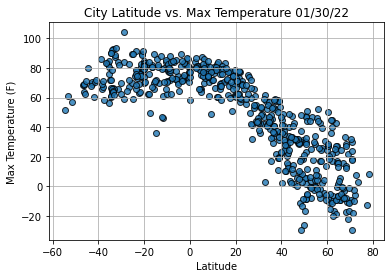

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

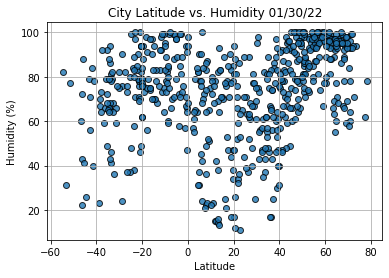

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

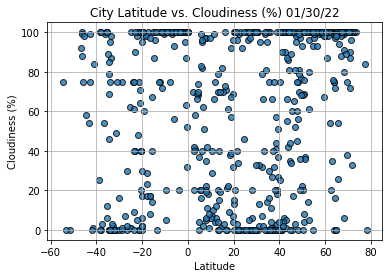

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

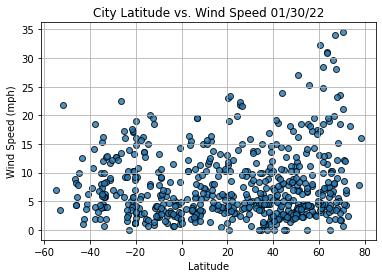

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

### Linear regression

In [17]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + " r-sq:" + str(round(r_value,3))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

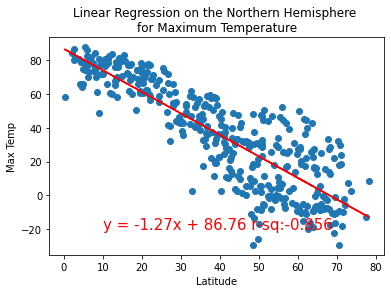

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature',
                       'Max Temp',(10,-20))

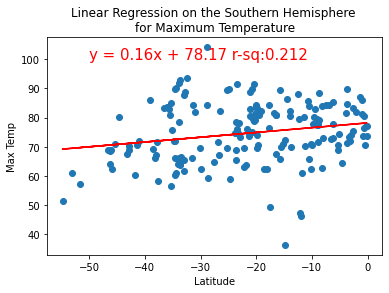

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature',
                       'Max Temp',(-50,100))

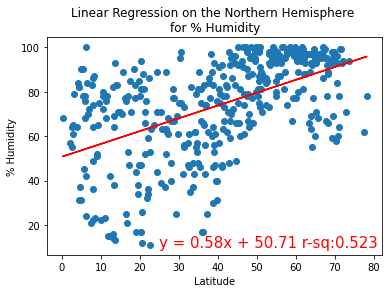

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity',
                       '% Humidity',(25,10))

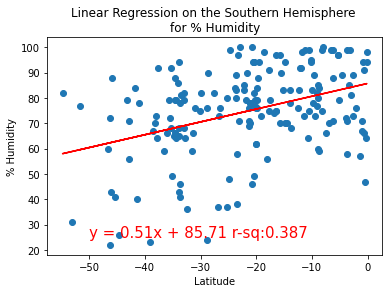

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity',
                       '% Humidity',(-50,25))

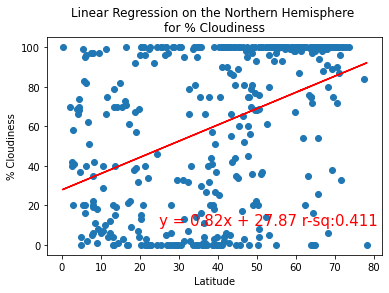

In [23]:
# Linear regression on the Northern Hemisphere - Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness',
                       '% Cloudiness',(25,10))

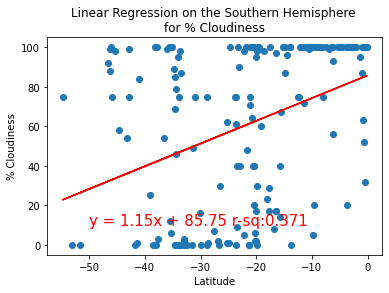

In [25]:
# Linear regression on the Southern Hemisphere - Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness',
                       '% Cloudiness',(-50,10))

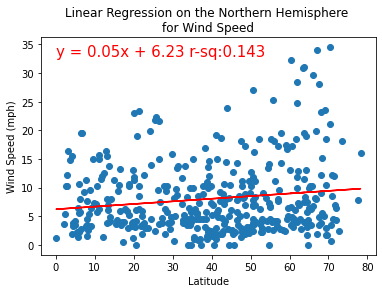

In [28]:
# Linear regression on the Northern Hemisphere - Wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed',
                       'Wind Speed (mph)',(0,33))

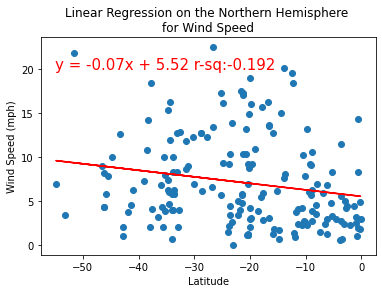

In [31]:
# Linear regression on the Southern Hemisphere - Wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed',
                       'Wind Speed (mph)',(-55,20))